In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde




In [5]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
## Data Preprocessing

missing_values = data.isnull().sum()

# Output the missing values
print(missing_values)
## BMI contains missing values

## Use simple imputer

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')  # or use strategy='median'

data['bmi'] = imputer.fit_transform(data[['bmi']])

# Check the results
print(data['bmi'].isnull().sum())  # Should be 0 if all missing values are filled




id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
0


In [8]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


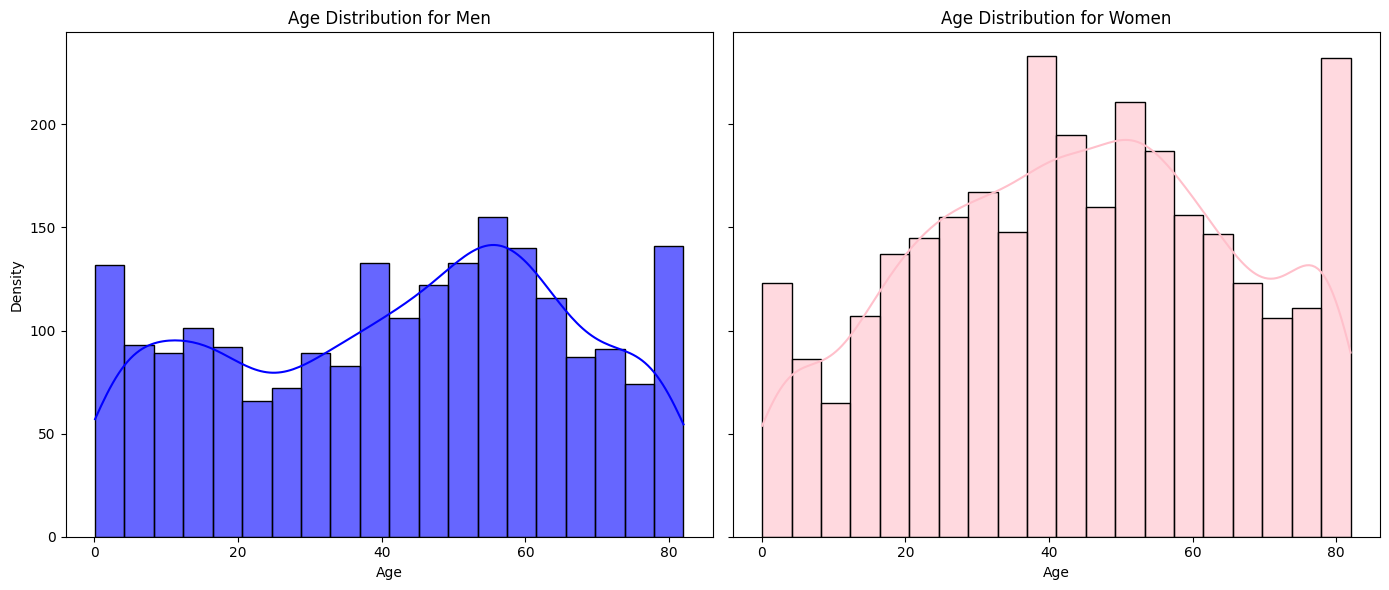

In [21]:
## EDA 

## Seperate data for men and women

data_men = data[data["gender"] == "Male"]
data_female = data[data["gender"] == "Female"]


fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data_men['age'], kde=True, color='blue', bins=20, stat='count', ax=axes[0], alpha=0.6)
axes[0].set_title('Age Distribution for Men')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

sns.histplot(data_female['age'], kde=True, color='pink', bins=20, stat='count', ax=axes[1], alpha=0.6)
axes[1].set_title('Age Distribution for Women')
axes[1].set_xlabel('Age')

plt.tight_layout()

plt.show()

From the above plots we can see that there is a higher count of females in this dataset with large proportion of females in the age range of 80. Wheras in the male age distribution graph there is a more even spread

/var/folders/wx/q1jmzm0j1xz16s45y4d2kz2m0000gn/T/ipykernel_68867/3197290833.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




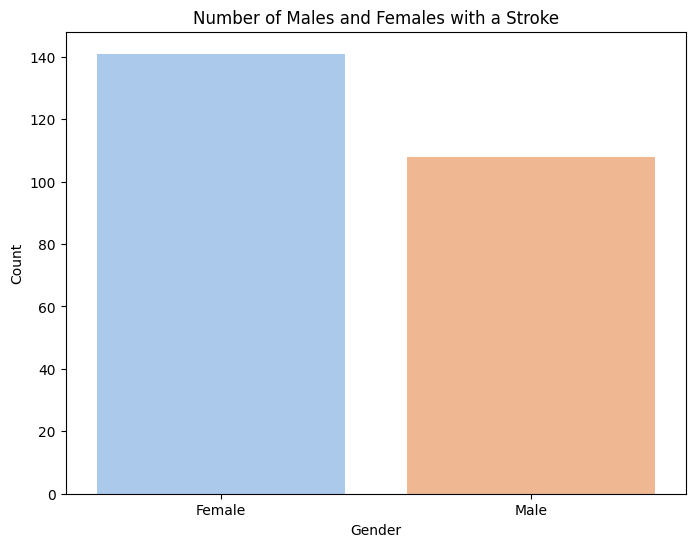

In [22]:
stroke_data = data[data['stroke'] == 1]

# Count the number of males and females with a stroke
gender_counts = stroke_data['gender'].value_counts()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel")

# Add titles and labels
plt.title("Number of Males and Females with a Stroke")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show plot
plt.show()
